# Week2授業課題２　富士下山問題

## 【問題1】データの可視化

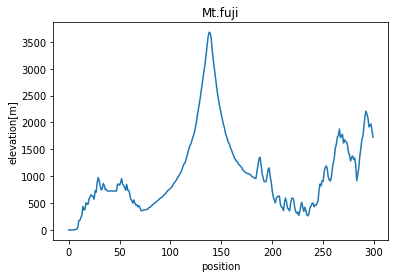

In [156]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
plt.title("Mt.fuji")
plt.xlabel("position") # その地点の番号
plt.ylabel("elevation[m]") # 標高
plt.plot(fuji[:,0,], fuji[:,3])
plt.show()

In [177]:
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


### 【問題2】ある地点の勾配を計算する関数を作成

In [170]:
def compute_slope(position):
    
    # 標高の変化量
    position_amount = fuji[position, 0] - fuji[position-1, 0]
    elevation_amount = fuji[position, 3] - fuji[position-1, 3]

    slope = elevation_amount/position_amount

    return slope

position = 100
compute_slope(position)


18.90000000000009

### 【問題3】移動先の地点を計算する関数を作成

In [280]:
# 今いる地点 position,異動先の地点　next_position, param=0.2

def move_point(position, param = 0.2):
    next_position = position - (param * compute_slope(position))
    
    if next_position < 0:
        print("Error : 地点0を超えました")
    
    elif next_position > 299:
        print("Error : 地点299を超えました")
    
    
    return int(next_position.round(decimals=0)) # 整数値じゃないとcompute_slope関数で配列の場所が指定できない

position = 100
print(move_point(position))

96


### 【問題4】山を下る関数を作成

In [281]:
def down_mt_fuji(position, param=0.2):
    # 初期化
    position_list = np.array( [] )
    position_list = np.append(position_list, position)

    # 下山地点が更新されなくなりるまで繰り返す
    for i in range(100):
        position = move_point(position, param) # 次の地点を算出して更新
        
        if position < 0 or position > 299: #地点が０〜２９９までなのでエラーを出し、中断
            return position_list
        
        elif position == position_list[-1]: # 今の地点と更新地点が同じか判定
            break # 地点が同じだったら、それ以上更新しないので、そこが最終地点
        
        else:
            position_list = np.append(position_list, position) # リストを更新して再度ループ

    return position_list
    
position = 136 # 最初は 136 ポジションから
position_list = down_mt_fuji(position) # 戻り値は下山地点リストが欲しい
print(position_list)


[136. 102.  98.  95.  93.  89.  85.  82.  79.  73.  70.  78.  77.  75.]


### 【問題5】下山過程の可視化

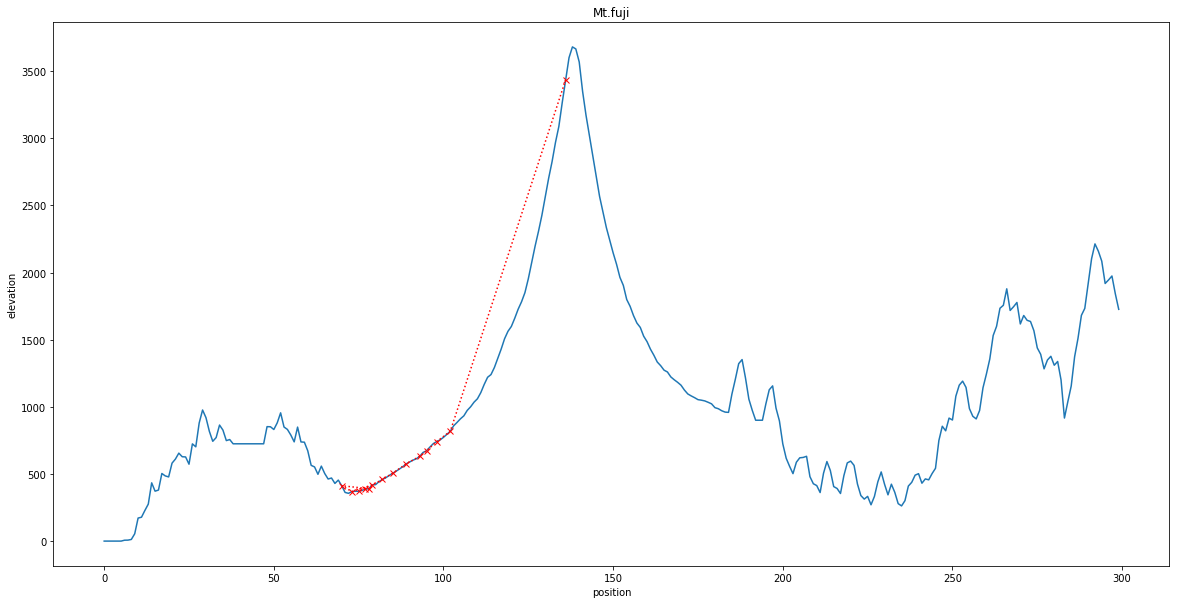

In [255]:
# plotを自動化する関数

def plot_down(position_list):
    elevation_list = np.array( [] )

    for i in range(len(position_list)):
        i_position = int(position_list[ i ])
        elevation_list = np.append(elevation_list, fuji[i_position, 3])
    
    plt.figure(figsize=(20, 10))
    plt.title("Mt.fuji")
    plt.xlabel("position")# その地点の番号
    plt.ylabel("elevation") # 標高
    plt.plot(fuji[:,0,], fuji[:,3])
    plt.plot(position_list,elevation_list , color = "r", marker = "x", linestyle =":" )
    plt.show()
    
    return

plot_down(down_mt_fuji(136))

### 【問題6】初期値の変更

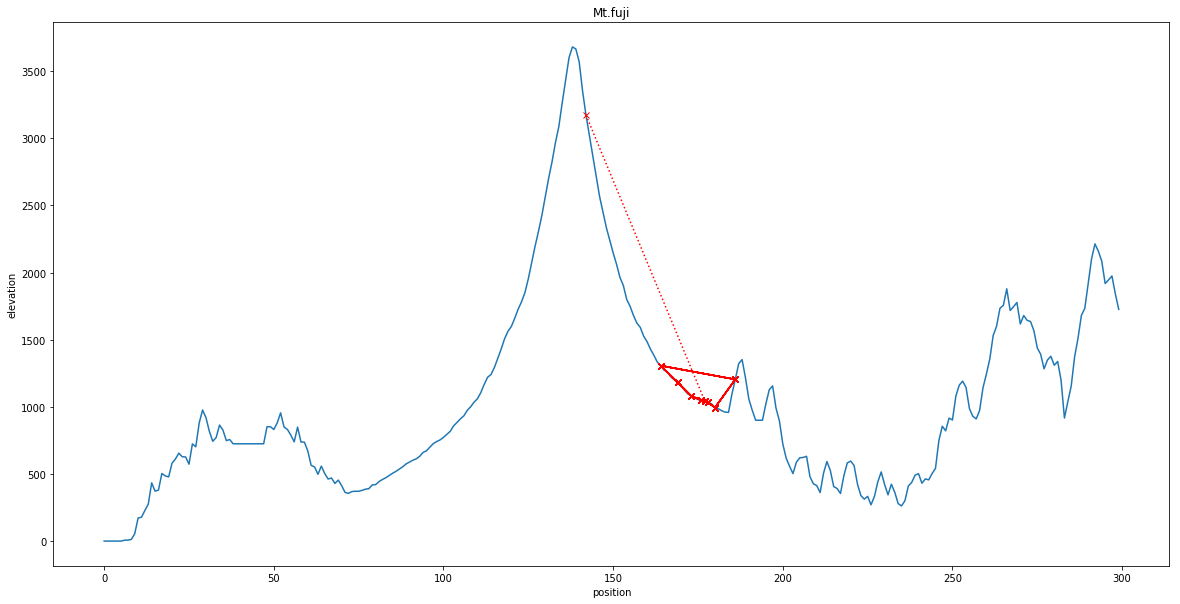

In [256]:
# 142地点から
plot_down(down_mt_fuji(142))

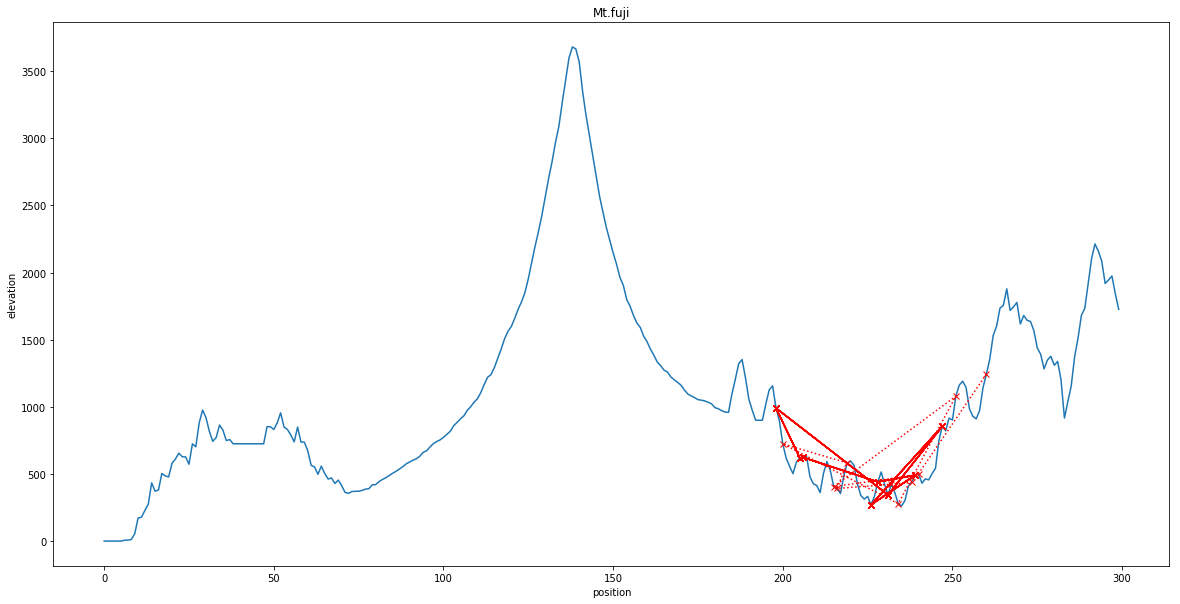

In [257]:
# 260 地点から
plot_down(down_mt_fuji(260))

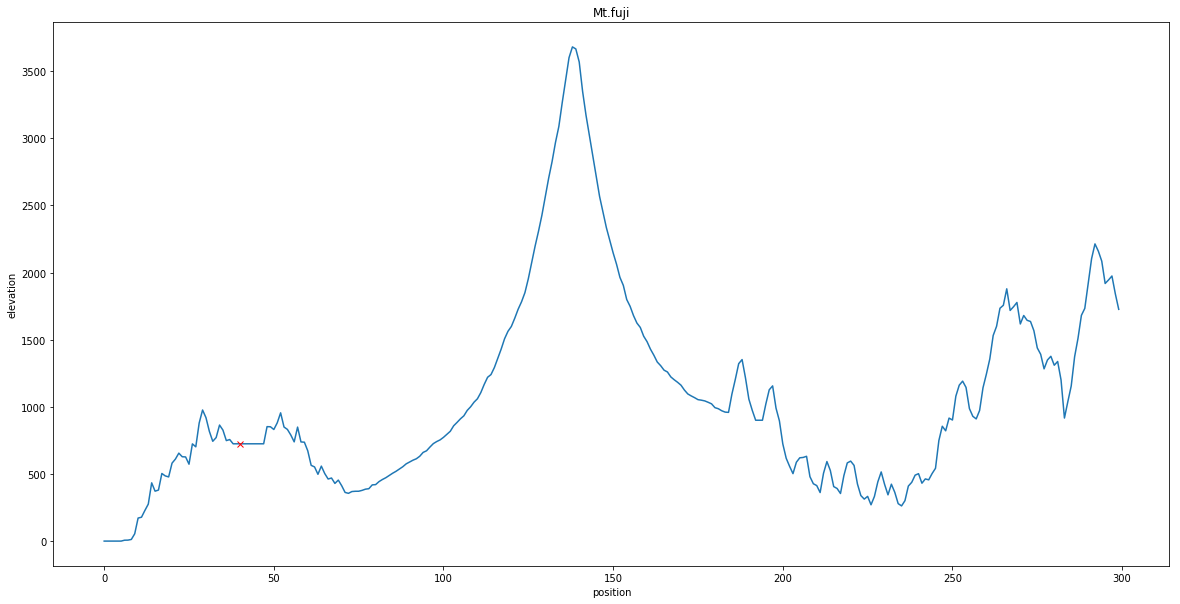

0.0


In [258]:
# 40地点から　（動いていないようだ）
plot_down(down_mt_fuji(40))

# 勾配を計算する関数
print(compute_slope(40))
# 40の地点は勾配０だった


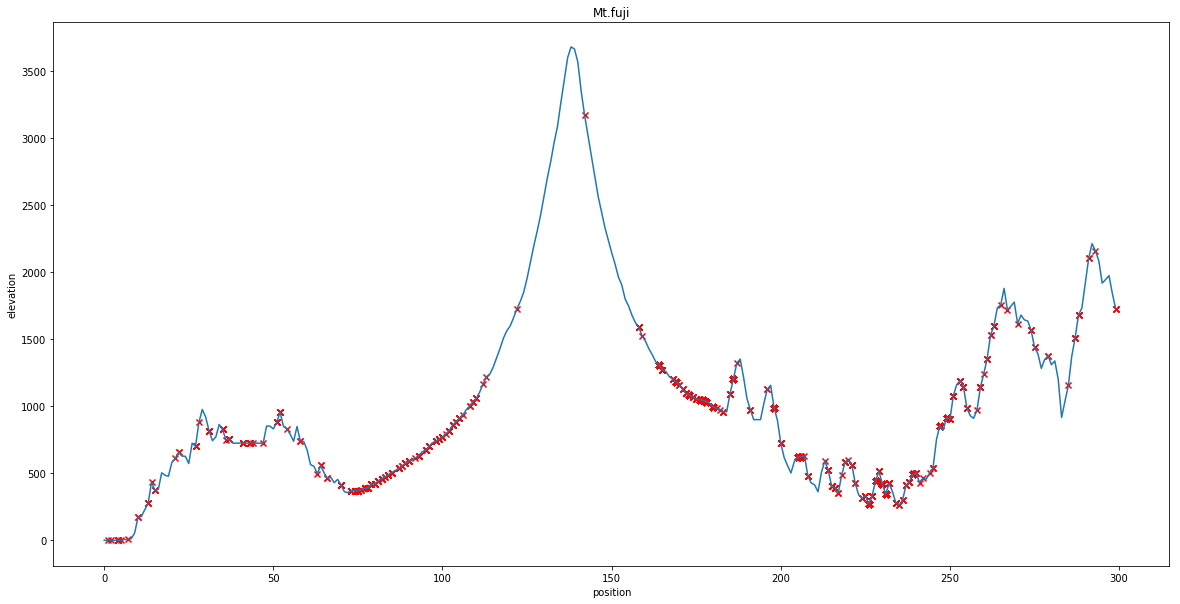

In [302]:
# 全地点をplotしてみる

# 自分でつけたエラー表示を出さないように改造
def move_point2(position, param = 0.2):
    next_position = position - (param * compute_slope(position))    
    return int(next_position.round(decimals=0)) 

def down_mt_fuji2(position, param=0.2):
    # 初期化
    position_list = np.array( [] )
    position_list = np.append(position_list, position)

    # 下山地点が更新されなくなりるまで繰り返す
    for i in range(100):
        position = move_point2(position, param) # 次の地点を算出して更新
        
        if position < 0 or position > 299: #地点が０〜２９９までなので、中断
            return position_list
        
        elif position == position_list[-1]: # 今の地点と更新地点が同じか判定
            break # 地点が同じだったら、それ以上更新しないので、そこが最終地点
        
        else:
            position_list = np.append(position_list, position) # リストを更新して再度ループ

    return position_list

# plotを自動化する関数を複数の出発地点からの動きを重ねられるよう改造
def plot_down2(position_list):
    elevation_list = np.array( [] )

    for i in range(len(position_list)):
        i_position = int(position_list[ i ])
        elevation_list = np.append(elevation_list, fuji[i_position, 3])
    
    plt.scatter(position_list,elevation_list , color = "r", marker = "x" )

    return

#グラフ作成
plt.figure(figsize=(20, 10))
plt.title("Mt.fuji")
plt.xlabel("position")# その地点の番号
plt.ylabel("elevation") # 標高

for i in range(300):
    position_list = down_mt_fuji2(i)
    position_list = position_list[1:]
    plot_down2(position_list)

plt.plot(fuji[:,0,], fuji[:,3])
plt.show()

### 【問題7】（アドバンス問題）ハイパーパラメータの変更

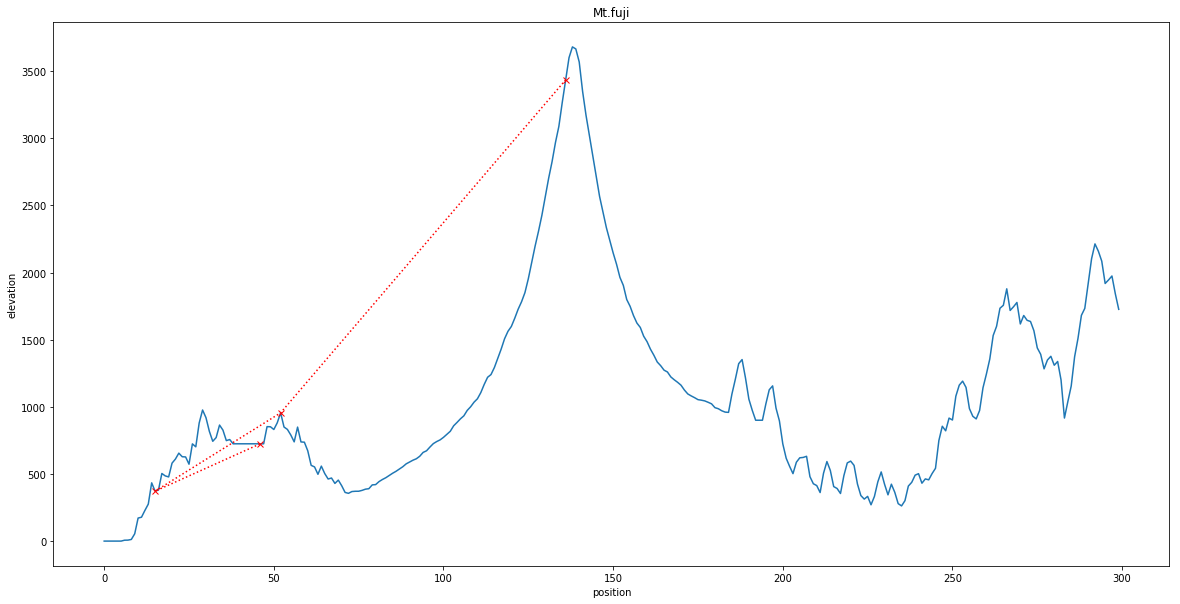

In [259]:
#  関数down_mt_fuji(スタート地点, ハイパーパラメーター)に設定したので、変更してみる

plot_down(down_mt_fuji(136, 0.5))

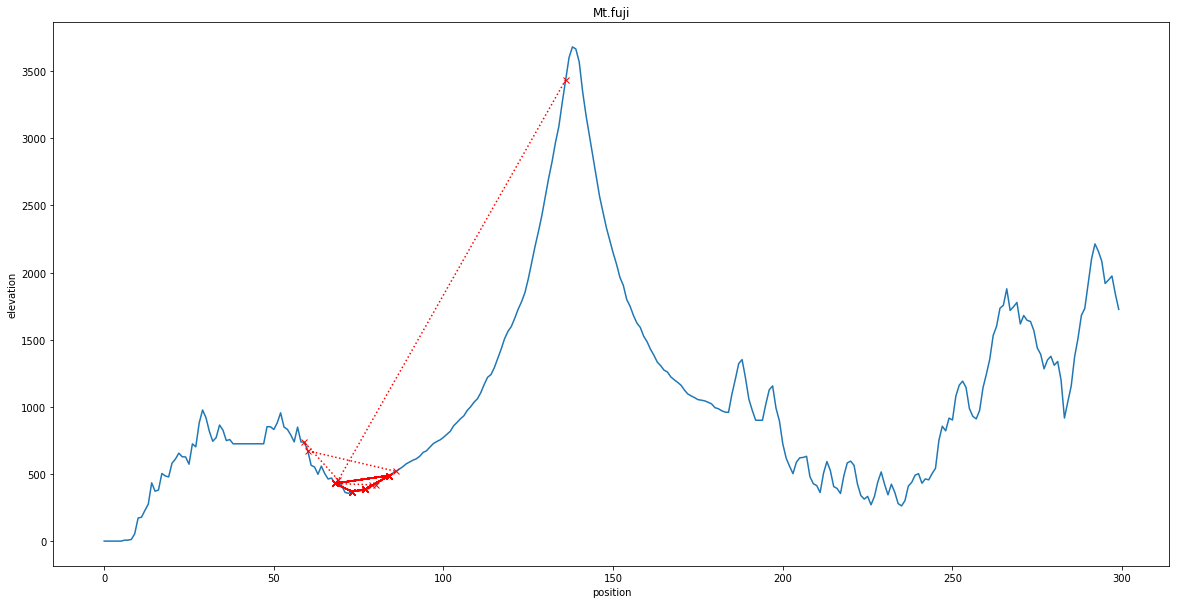

In [260]:
plot_down(down_mt_fuji(136, 0.4))

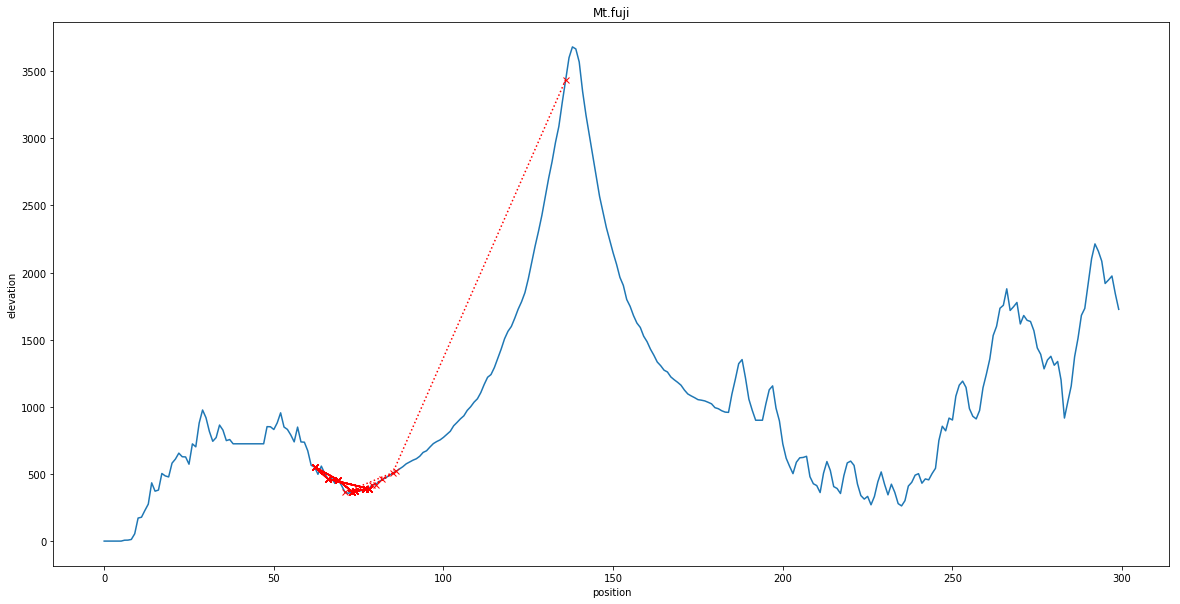

In [261]:
plot_down(down_mt_fuji(136, 0.3))

Error : 地点299を超えました


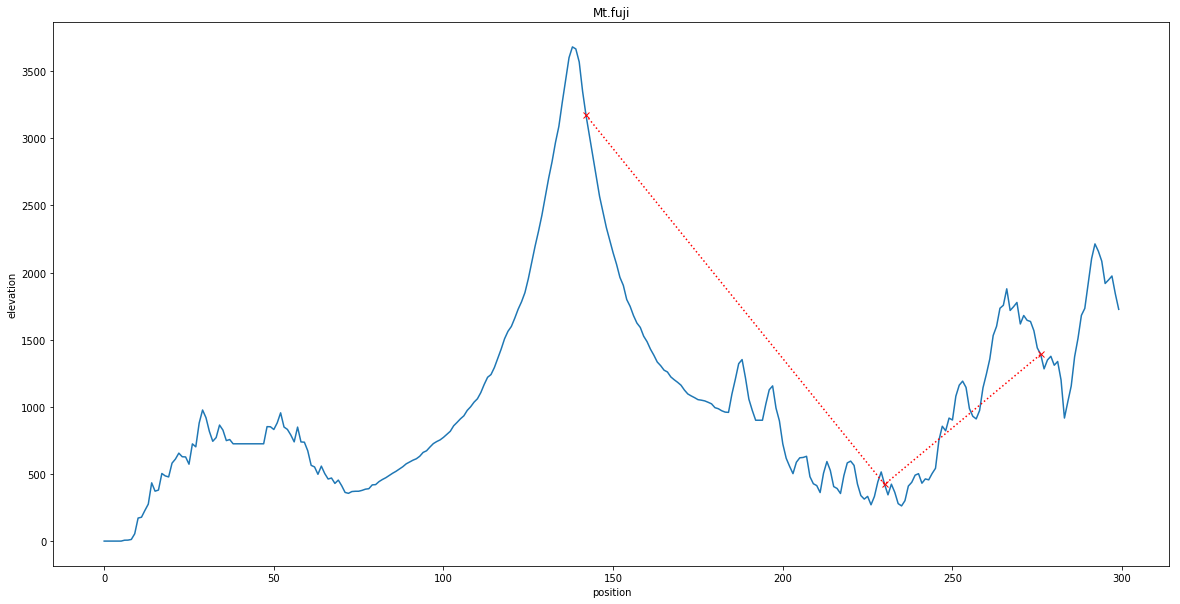

In [282]:
plot_down(down_mt_fuji(142, 0.5))
# 地点299を超えエラー

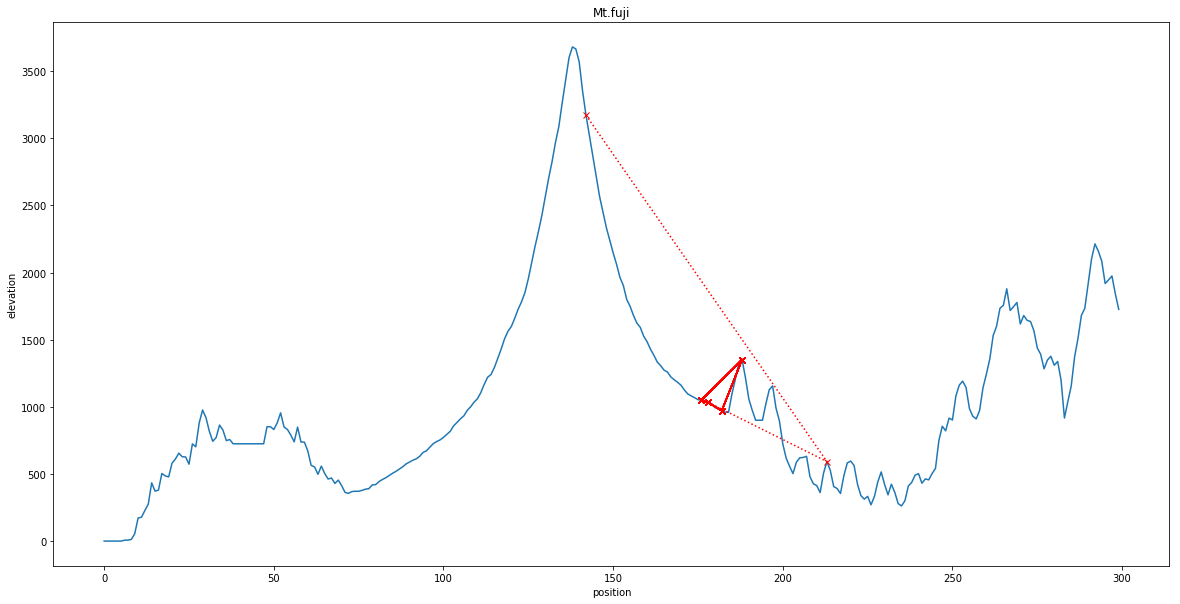

In [263]:
plot_down(down_mt_fuji(142, 0.4))

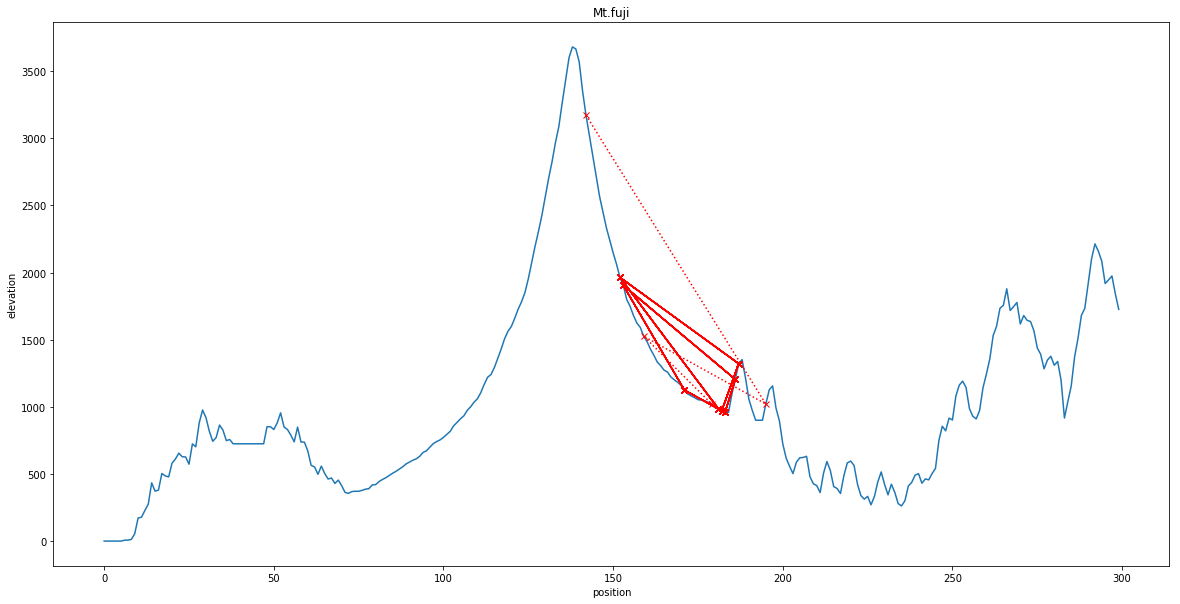

In [264]:
plot_down(down_mt_fuji(142, 0.3))